# Introduction

For this project, we will act as a data researcher for the World Health Organization. We will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, we will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After we perform analysis, we'll be creating an article with our visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy we will need to load the datasets into DataFrames so that they can be visualized.

We load **all_data.csv** into a DataFrame called `df` and then, quickly inspect the DataFrame using `.head()`.

In [21]:
df=pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [22]:
# method 1
print(df.Country.unique())

# method 2
print(list(df['Country'].value_counts().index))

# method 3 (same as 1)
print(df.Country.unique().tolist())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
['China', 'Mexico', 'Zimbabwe', 'United States of America', 'Germany', 'Chile']
['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


What years are represented in the data?

In [23]:
# method 1
print(list(df['Year'].value_counts().index))

# method 2
print(df.Year.unique())

# method 3
print(df.Year.unique().tolist())

[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


## Step 4 Tweak The DataFrame

We look at the column names of the DataFrame `df` using `.head()` once again. 

In [24]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


We notice the first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

We change the name of the last column to `LEABY`.


In [25]:
df.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=True)

Running `df.head()` again to check your new column name worked.

In [26]:
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) We create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 

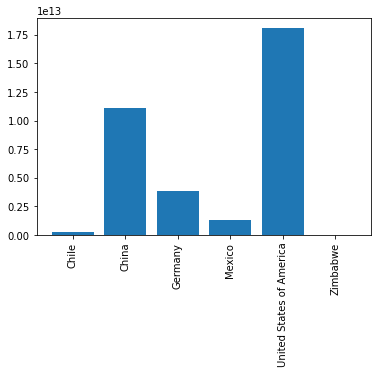

In [27]:
plt.bar(df.Country, df.GDP)
plt.xticks(rotation=90)
plt.savefig('barPlot_GDP.png')
plt.show()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

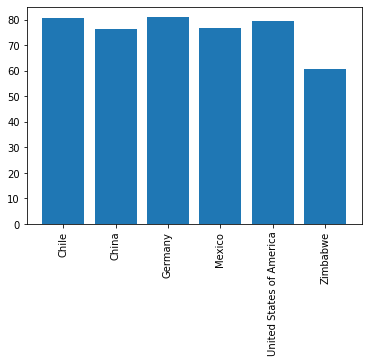

In [28]:
plt.bar(df.Country, df.LEABY)
plt.xticks(rotation=90)
plt.savefig('barPlot_LEABY.png')
plt.show()

What do you notice about the two bar charts? Do they look similar?
> There is no similarity between the two bar charts at all. Infact there is a huge variance between the GDP of countries, where as the Life Expectancy at Birth (LEABY in years) show very close if not similar between the countries except for Zimbabwe.

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

1. Assign figure size 15x10 by creating an object and assigning to `fig` 
2. Created an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
3. Plotting the graph

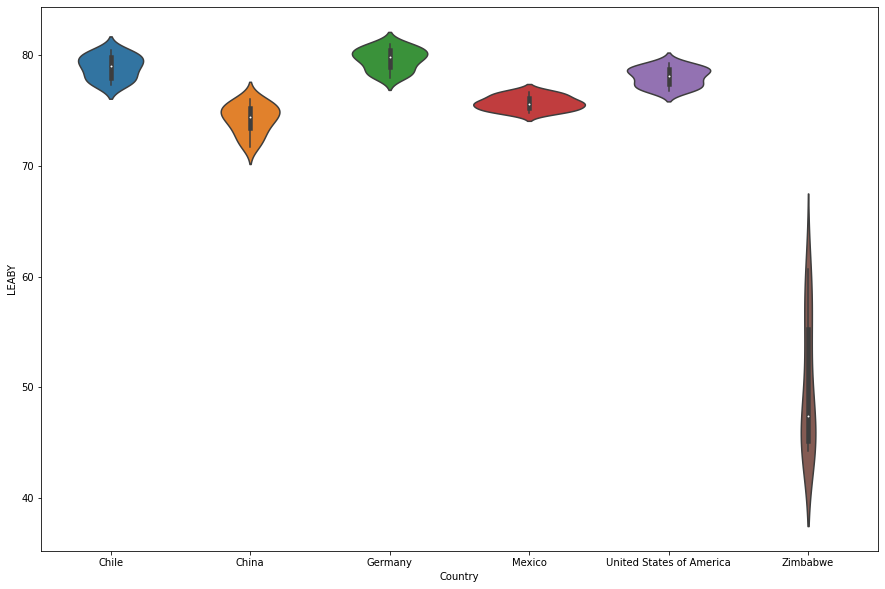

In [29]:
fig = plt.subplots(figsize=(15, 10)) 
sns.violinplot(data=df, x='Country', y='LEABY')
plt.savefig('violinPlot_LEABY.png')
plt.show()

What do you notice about this distribution? Which country's life expactancy has changed the most?
> We get a much better picture in this violin plot than the bar chart as we can see the interquartile ranges and distributions amongst the various countries. Zimbabwe comes up to be the country with the lowest Life Expectancy which would probably be followed by China and Mexico. Germany and Chile top the charts with higher Life Expectancy.

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, we plot the progession of GDP's over the years by country in a barplot using Seaborn.
1. We save `sns.barplot()` to a variable named `ax`
2. We then chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot.
3. Used the `Year` as a `hue` to differentiate the 15 years in our data.
4. Since the names of the countries are long, we rotate their label by 90 degrees so that they are legible. 
5. Also, since our GDP is in trillions of US dollars, we make sure our Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`.

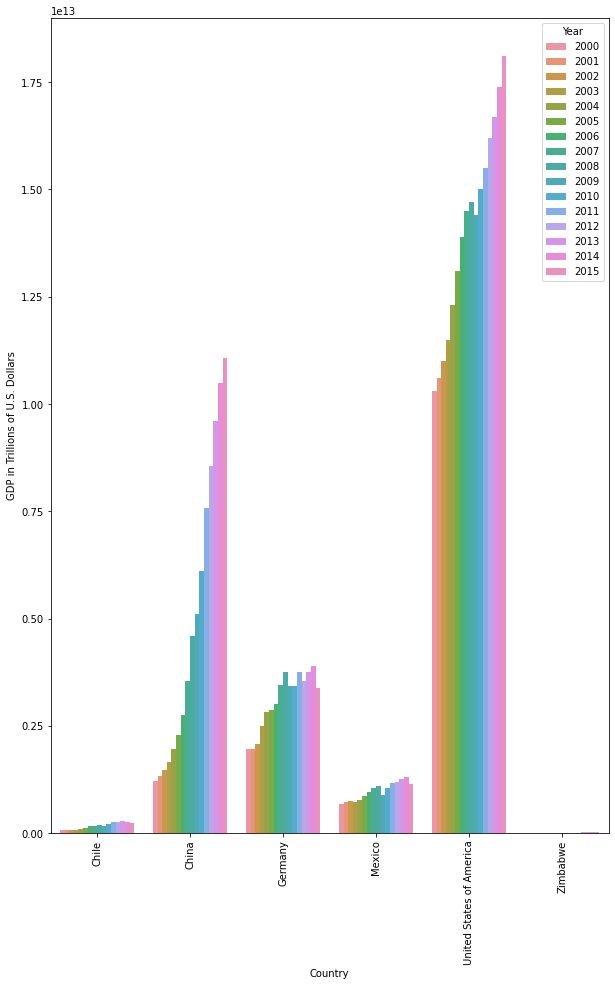

In [30]:
f, ax = plt.subplots(figsize=(10, 15)) 
sns.barplot(data=df, x='Country', y='GDP', hue='Year')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.xticks(rotation=90)
plt.savefig('barPlot_GDP_with_Years.png')
plt.show()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above!
1. Changed our `y` value to `LEABY` in order to plot life expectancy instead of GDP. 
2. Tweaked the name of our `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` 

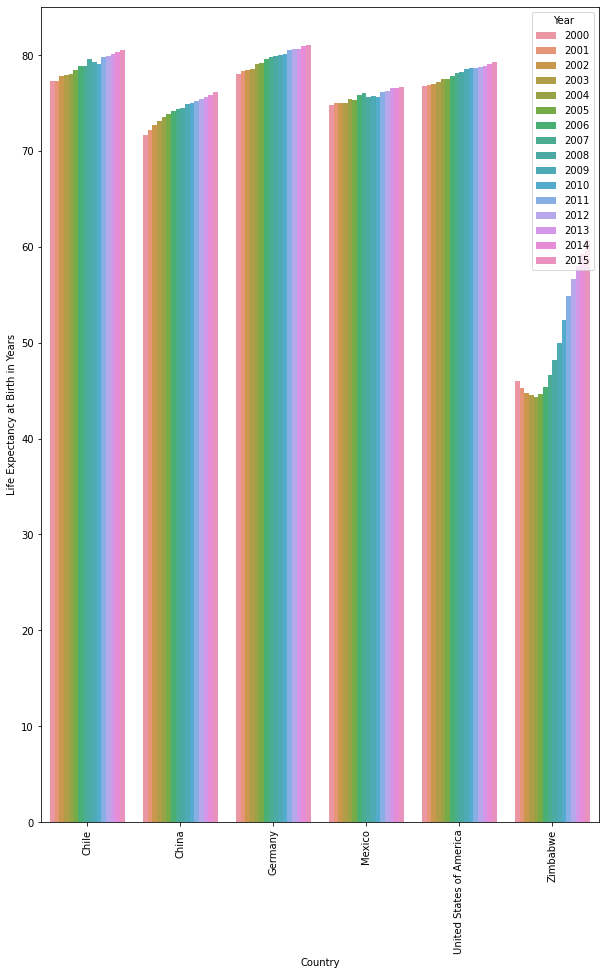

In [31]:
f, ax = plt.subplots(figsize=(10, 15)) 
sns.barplot(data=df, x='Country', y='LEABY', hue='Year')
plt.ylabel('Life Expectancy at Birth in Years')
plt.xticks(rotation=90)
plt.savefig('barPlot_LEABY_with_YEARS.png')
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

In [32]:
## China has a very steep growth over the years, especially after 2003, 2004 its GDP shoots up and keeps on increasing.
## We can notice the slight dip in GDP around 2008-2009 when the financial crisis happened. It's affect can be see in countries like 
## USA, Mexico, Germany, but no affect on China
## Zimbabwe GDP is too minimal that it barely shows up when compared on the scale to other countries
## Chile and Germany both have Life Expectancy above 80, and this tells even though Chile's GDP is very low,
## the life expectancy is still high.
## Zimbabwe's Life Expectancy does catch attention as the LEABY decreases after 2000 over the 5 year period, 
## only to improve and get better after 2005. This is possible because of the turbulent government, and crisis.
## This again can be noticed in Mexico & USA, two neighbouring countries with a huge difference between the GDP
## yet the life expectancy isn't too far from each other. USA does have higher life expectancy, but still falls short
## when compared to Chile and Germany with much much lower GDP.
## This gives an idea that GDP and Life Expectancy don't have a correlation and would need further studied to be proven so.

Note: We've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


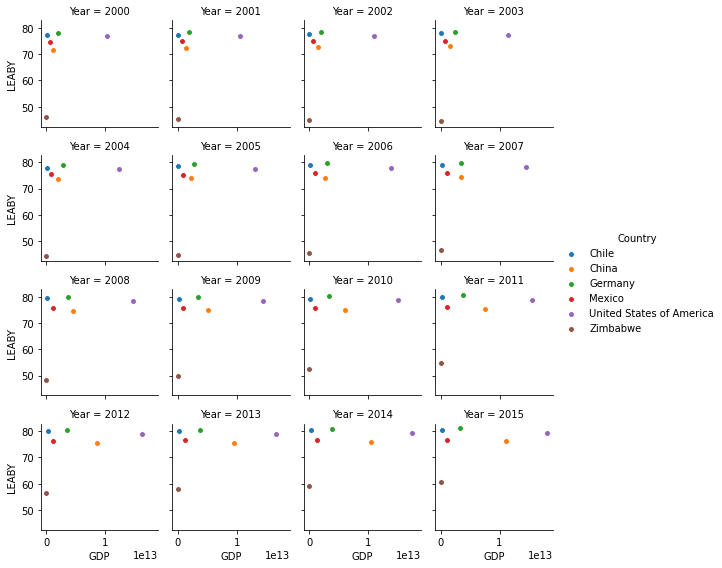

In [33]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter

g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, height=2)
g = (g.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend())
plt.savefig('scatterPlot_LEABY_with_Years.png')
plt.show()

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

In [34]:
# China moves across the X axis the most
# Zimbabwe moves across the Y axis after the years 2005 there's an increase and growth in Life expectancy.
# Based on seeing the other charts and this, it's not surprisng at all.
# Their policies and communist rule with heavy focus on mass manufacturing reved up their economy increasing their
# GDP at a steep growth.
# Since there are too many scatter plots, and they are mini-graphs it's hard to get an accurate reading but rather
# only to see some trends which does help.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



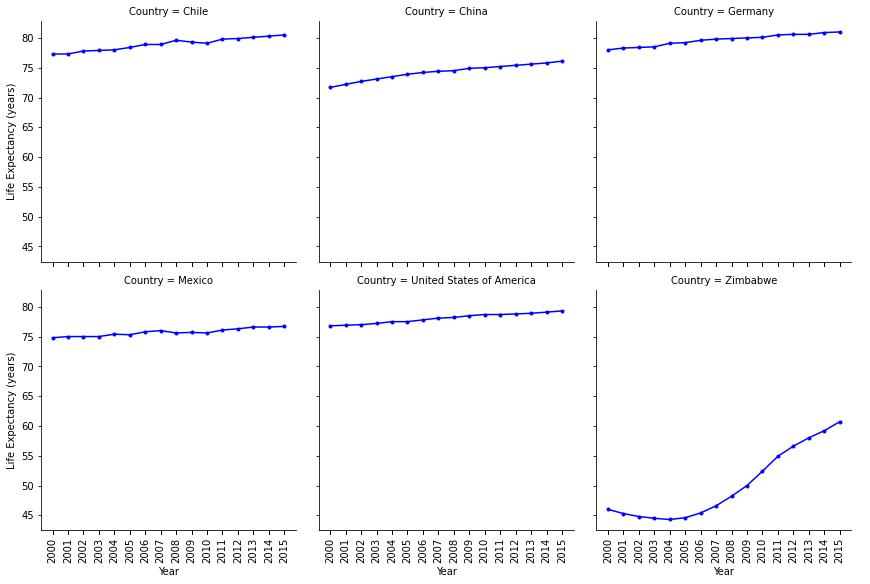

In [35]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"


# Uncomment the code below and fill in the blanks
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "LEABY", marker='.', linestyle='-', color='b').add_legend().set_axis_labels('Year', 'Life Expectancy (years)'))
g3.set(xticks=df.Year)
g3.set(xticklabels=range(2000,2016))
g3.set_xticklabels(rotation=90)
plt.savefig('linePlot_LEABY_by_Year_and_Country.png')
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
> Zimbabwe has a very visual change among all the countries
- What years are there the biggest changes in the data?
> Again it seems to be Zimbabwe with the biggest changes in data, whilst other ofcourse have a change but not as significant.
- Which country has had the least change in life expectancy over time? 
> Mexico, where the Life Expectancy start at 75 in 2000 and increase only by an year or two by 2015
- Can you think of any reasons that the data looks like this for particular countries?

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


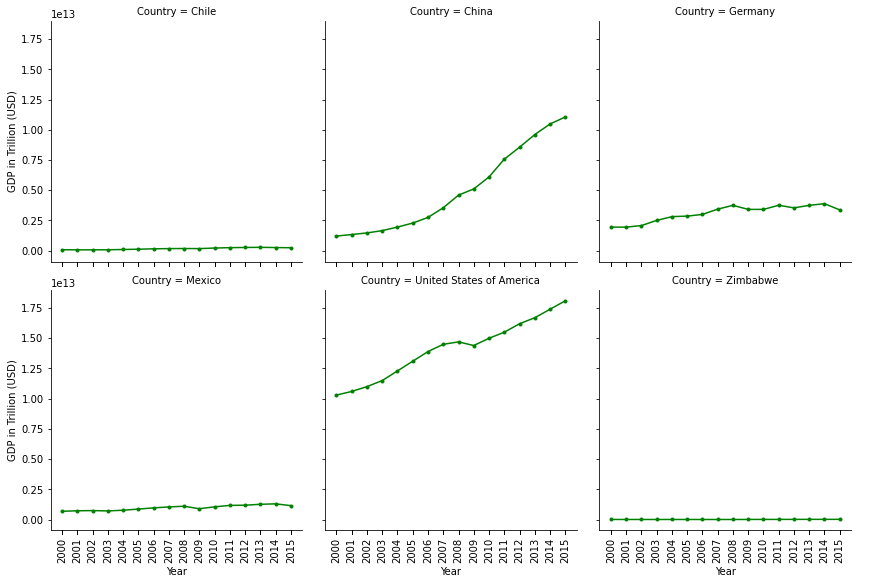

In [36]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "GDP", marker=".", color='g').add_legend().set_axis_labels('Year', 'GDP in Trillion (USD)'))
g3.set(xticks=df.Year)
g3.set(xticklabels=range(2000,2016))
g3.set_xticklabels(rotation=90)
plt.savefig('linePlot_GDP_by_Year_and_Country.png')
plt.show()

Which countries have the highest and lowest GDP?

> **Highest**: USA and China

> **Lowest**: Zimbabwe, Mexico and Chile

Which countries have the highest and lowest life expectancy?

> **Highest:** Germany and Chile

> **Lowest:** Zimbabwe